# Chapter 1: Exploring rasterio

ติวเตอร์เรียลชุดนี้ นำโค้ดจาก https://github.com/patrickcgray/open-geo-tutorial มาทำการดัดแปลงเพื่อสอนนิสิต ภูมิศาสตร์ ป.ตรีและภูมิสารสนเทศศาสตร์ ป.โท ม.นเรศวรครับ

ทักษะที่นิสิตต้องมีพื้นฐานมาก่อน แน่นอนประการแรกก็คือ องค์ความรู้ทางด้านรีโมทเซนซิ่ง ส่วนทักษะในการโปรแกรมคือ
1. ภาษาไพธอน หากคิดว่ายังไม่มีหรือยังไม่แน่ใจ ให้เรียนของอาจารย์ประเสริฐ วีดีโอที่ 1-123 https://www.youtube.com/watch?v=bu6kwrpOqFM&list=PLoTScYm9O0GH4YQs9t4tf2RIYolHt_YwW&index=1 หรือ สอนยูทูปเบื้องต้นของ ผม ผศ.ดร.นัฐพล มหาวิค วีดีโอที่ 3-4 https://www.youtube.com/watch?v=JM8TtBm1yHs&list=PL2e-NEAjUyLFlRjQ5fQBrX_8M-onbMQHf&index=3 
2. Numpy อาเรย์ หากยังไม่แน่ใจว่ามีทักษะหรือไม่ ให้เรียนของ อาจารย์ประเสริฐ เพลย์ลิสนี้ https://www.youtube.com/watch?v=ts2L5mtMMi8&list=PLoTScYm9O0GFNEpzsCBEnkUwgAwOu_PWw หรือของผม ผศ.ดร.นัฐพล มหาวิค วีดีโอ 3-6 https://www.youtube.com/watch?v=bLQoL3gr1zQ&list=PL2e-NEAjUyLE23az8n-yGN5MbWju8MNVk&index=3 
3. matplotlib หากยังไม่เชี่ยวชาญ ให้เรียนของ อาจารย์ประเสริฐ เพลย์ลิสต่อไปนี้ https://www.youtube.com/watch?v=WOEOH8OV99k&list=PLoTScYm9O0GGRvUsTmO8MQUkIuM1thTCf หรือ ของผม ผศ.ดร.นัฐพล มหาวิค วีดีโอที่ 7 ครับ https://www.youtube.com/watch?v=0nk977YAhTA&list=PL2e-NEAjUyLE23az8n-yGN5MbWju8MNVk&index=7

## Introduction
* แบบฝึกหัดนี้นำโค้ดมาจาก http://patrickgray.me/open-geo-tutorial/chapter_1_rasterio.html
* แนะนำ GDAL https://gdal.org/api/python.html  the Geospatial Data Abstraction Library is a software library for reading and writing raster and vector geospatial data formats and forms the basis of most software for processing geospatial data. There are many formats for using GDAL ranging from graphical tools like ArcGIS or QGIS to command line GDAL tools but here we're using the fantastic rasterio python package which provides a pythonic wrapping around GDAL. Basically it reads and writes geospatial formats and provides a Python API based on numpy N-dimensional arrays and GeoJSON. 

## การนำเข้าโมดูลในไพธอน
* Before we can get started, we need to tell Python that we will be using functions, classes, and variables from some packages. The technical wording for this is that we need to import these modules into our namespace (see Python's documentation on the module system here). We will do this using some import statements:

In [3]:
import rasterio     # นำเข้า raterio เพื่อใช้ฟังก์ชัน
import matplotlib   # นำเข้า matplotlib เพื่อใช้ในการพลอตกราฟ แผนที่

In [4]:
# ตรวจสอบเวอร์ชัน
print("rasterio's version is: " + rasterio.__version__)
print(rasterio)

rasterio's version is: 1.2.10
<module 'rasterio' from 'C:\\Users\\Admin\\anaconda3\\envs\\pyrsIntro\\lib\\site-packages\\rasterio\\__init__.py'>


สังเกตุ path ของโปรแกรมที่ติดตั้งไว้จะอยู่ใน env ที่เราได้สร้างไว้ pyrsIntro อย่างไรก็ตาม หากนิสิตลงโปรแกรมโดย yml ไฟล์ ก็จะต้องไปดูในไฟล์ว่าระบุ env ที่ชื่ออะไร นิสิตสามารถเปลี่ยนชื่อ env ได้ ก่อนการติดตั้งใน conda

## การเรียกใช้ฟังก์ชันใน rasterio

### เปิดไฟล์

ภาพที่ใช้คือ ภาพเซนติเนล 2 บริเวณม.นเรศวร ที่ผมได้ทำการตัดภาพมาแล้ว ดาวน์โหลดภาพมาจาก https://scihub.copernicus.eu/dhus/#/home หากใครยังไม่มียูสเซอร์ ก็ให้ signup สมัคร แล้วทำการดาวน์โหลดภาพที่ตนเองสนใจมา ผมได้สอนวิธีการดาวน์โหลดไว้ในยูทูปแล้ว https://www.youtube.com/watch?v=YVbu3UoR9oU&list=PL2e-NEAjUyLFEMS9aJUMbN75Mp9otPfBz&index=2  

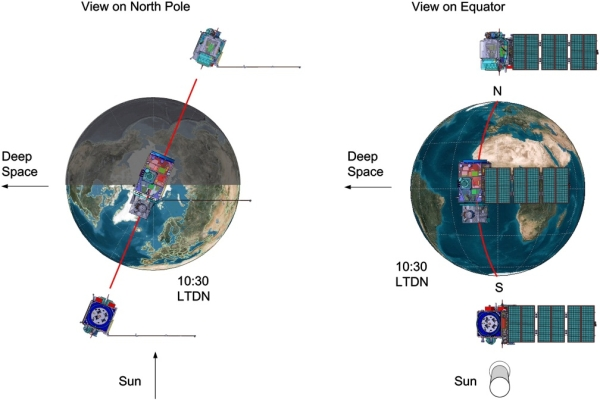
https://sentinel.esa.int/web/sentinel/missions/sentinel-2/overview

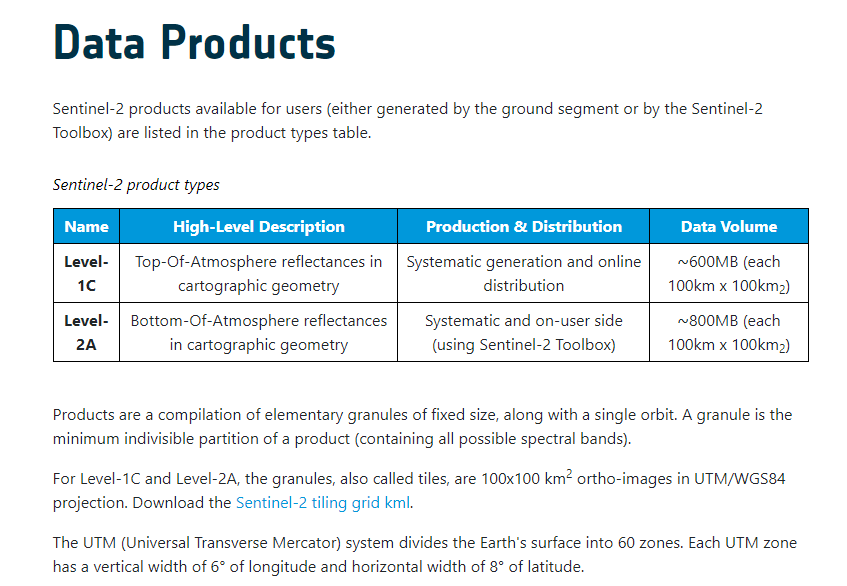
https://sentinel.esa.int/web/sentinel/missions/sentinel-2/data-products

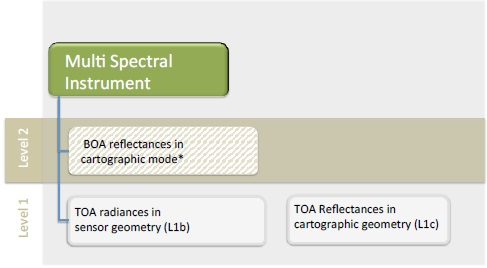

* รายละเอียดเกี่ยวกับช่วงคลื่น sentinel-2 และความละเอียดเชิงพื้นที่
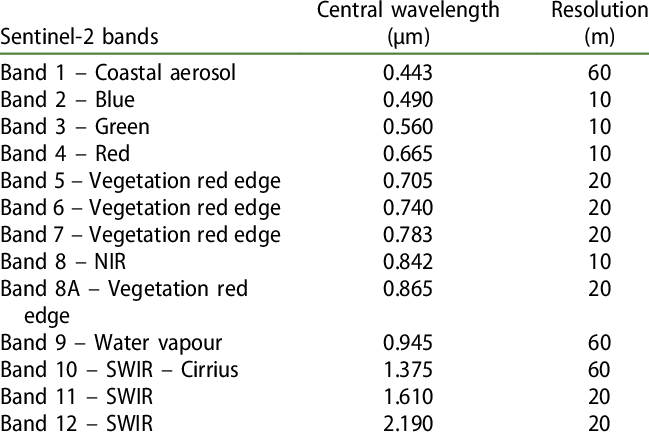

* เปรียบเทียบช่วงคลื่น
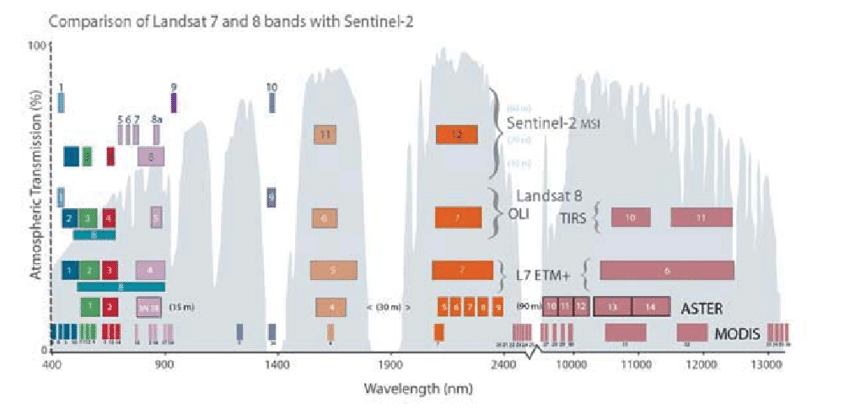

In [40]:
# ชื่อไฟล์
img_fp = './1data/phl_s2_clip_nu.tif'

# หากพบว่าไฟล์ที่ดาวน์โหลดมาเป็นไฟล์ที่แยกกัน แล้วต้องการรวมแบนด์กัน ให้ไปใช้โค้ด http://patrickgray.me/open-geo-tutorial/chapter_2_indices.html

In [10]:
# เปิดไฟล์
dataset = rasterio.open(img_fp)
print(dataset)

<open DatasetReader name='./1data/phl_s2_clip_nu.tif' mode='r'>


ตอนนี้เราอยู่ในโหมด r=read ไฟล์แล้ว

### ตรวจดูแอทริบิวต์ของภาพ

In [11]:
# ชื่อภาพ
img_name = dataset.name
print('Image filename: {n}\n'.format(n=img_name))

Image filename: ./1data/phl_s2_clip_nu.tif



In [12]:
# มีกี่แบนด์ในภาพนี้
num_bands = dataset.count
print('Number of bands in image: {n}\n'.format(n=num_bands))

Number of bands in image: 13



In [13]:
# มีจำนวนแถวและคอลัมน์เท่าไหร่
rows, cols = dataset.shape
print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

Image size is: 474 rows x 696 columns



In [22]:
# มี metadata ไหมที่บรรยายข้อมูลภาพ
desc = dataset.descriptions
metadata = dataset.meta

print('Raster description: {desc}\n'.format(desc=desc))

# ปริ้นท์ค่า metadata ของภาพทั้งหมด
print('All raster metadata:') #
print(metadata)
print('\n')

Raster description: (None, None, None, None, None, None, None, None, None, None, None, None, None)

All raster metadata:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 696, 'height': 474, 'count': 13, 'crs': CRS.from_epsg(32647), 'transform': Affine(10.0, 0.0, 624540.0,
       0.0, -10.0, 1854740.0)}




In [17]:
# ไดร์เวอร์อะไรที่ใช้ในการเปิดข้อมูลราสเตอร์นี้
driver = dataset.driver
print('Raster driver: {d}\n'.format(d=driver))

Raster driver: GTiff



In [18]:
# ภาพใช้เส้นโครงแผนที่อะไร
proj = dataset.crs
print('Image projection:')
print(proj, '\n')

Image projection:
EPSG:32647 



เส้นโครงแผนที่อยู่ในรูปแบบ "Well Known Text" หรือ WKT สำหรับรูปแบบอื่นเช่น proj4 string, WKT, ESRI WKT, JSON, etc.  นิสิตสามารถเข้าไปศึกษาได้ที่ https://www.spatialreference.org/

In [19]:
# ค่า "geo-transform"
gt = dataset.transform

print('Image geo-transform:\n{gt}\n'.format(gt=gt))

Image geo-transform:
| 10.00, 0.00, 624540.00|
| 0.00,-10.00, 1854740.00|
| 0.00, 0.00, 1.00|



ค่า geo-transform ประกอบไปด้วยตัวเลข 6 จำนวน ที่จะใช้แปลงค่าพิกเซลไปเป็นค่าพิกัดตามเส้นโครงแผนที่ที่ได้ระบุไว้ 
* ในที่นี้ค่ามุมซ้ายบนของพิกเซลในภาพคือ 624540.00และ1854740.00 
* ส่วนขนาดพิกเซลมีค่าเท่ากับ 10 เมตร 

สามารถเข้าไปศึกษา GDAL data model ได้จาก https://gdal.org/user/raster_data_model.html

### ข้อมูลแบนด์ในราสเตอร์
* ต่อไปจะทำการอ่านข้อมูลแต่ละแบนด์เข้ามาในรูปแบบของ numpy อาเรย์ 

In [24]:
# เปิดภาพแบนด์ NIR ของเซนติเนล 2 คือ เฉพาะแบนด์ที่ 8
nir = dataset.read(7) # 7 คือ ภาพที่ 8  
nir.shape # ตรวจสอบมิติของข้อมูลภาพ

(474, 696)

In [26]:
import numpy as np # np เรียกว่า alias หรือ เป็นการเรียกชื่อย่อของแพคเกจ
print(np.__version__)

1.22.3


In [29]:
# ชนิดของข้อมูลในแต่ละแบนด์ มีการจัดเก็บ datatype เป็นแบบใด
datatype = dataset.dtypes
print('Band datatypes: {dt}'.format(dt=datatype))

Band datatypes: ('uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16')


In [31]:
# ตรวจดูค่าสถิติของภาพแบนด์ที่เลือก
band_mean = np.mean(nir)
band_min = np.amin(nir)
band_max = np.amax(nir)
band_stddev = np.std(nir)
print('Band range: {minimum} - {maximum}'.format(maximum=band_max,
                                                 minimum=band_min))
print('Band mean, stddev: {m}, {s}\n'.format(m=band_mean, s=band_stddev))

Band range: 428 - 7119
Band mean, stddev: 2118.5941607255445, 522.5111711251513



เมื่อทำการตรวจสอบข้อมูลแบนด์ตัวอย่างแล้ว ที่นี้ต้องการที่จะอ่านทุกแบนด์เข้ามา ด้วยการใช้เมธอด read() โดยเมธอดนี้นอกจากจะอ่านข้อมูลแล้ว ยังสามารถระบุให้อ่านเฉพาะช่วงหรือบางบริเวณของภาพก็ได้ ในกรณีที่ภาพใหญ่จำเป็นที่จะต้องอ่านเฉพาะ row/column ที่ต้องการเท่านั้น หรือ subset ข้อมูลในอาเรย์ก่อน เพราะหากภาพใหญ่เกินไป อาจพบปัญหาในการ run out of memory  

แต่ในที่นี้เราจะอ่านเข้ามาทั้งหมดทุกส่วนภาพ และทุกแบนด์

In [32]:
full_img = dataset.read()
full_img.shape # bands, rows, cols

(13, 474, 696)

เมื่ออ่านภาพเข้ามาเก็บไว้ใน numpy แล้ว เราก็จะสามารถจัดการข้อมูลภาพได้ ไม่ว่าจะเป็นการคำนวณระหว่างแบนด์ด้วยการใช้ linear algebra การทำการคำนวณค่าสถิติเป็นต้น

ต่อไป จะทำการพลอตภาพเพื่อให้ดูเป็นตัวอย่างก่อน เฉพาะภาพ nir  ในรูปแบบค่าสีเทา

Image dimensions:  (13, 474, 696)


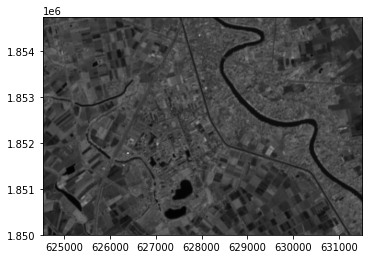

<AxesSubplot:>

In [33]:
from rasterio.plot import show # ใช้ฟังก์ชัน show อย่างง่าย ต่อการแสดงผลข้อมูลภาพ

print("Image dimensions: ", full_img.shape) 

show(nir, transform=dataset.transform, cmap='gray') # สังเกตุว่าใช้ข้อมูล nir โดยใช้ค่า cmap ในแบบสีเทา gray

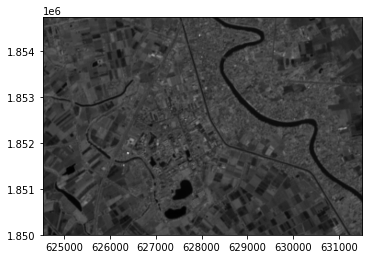

<AxesSubplot:>

In [39]:
show(full_img[5], transform=dataset.transform, cmap='gray')  
# ให้ทดลองเปลี่ยนเลขใน [] ตามแบนด์ที่นิสิตต้องการ 0 คือ แบนด์ที่ 1 ของเซนติเนล 2